# Machine Learning Models

In [1]:
# Import the modules
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---

## Reading 'events' csv file

In [2]:
# Read the CSV file from the 'Resources' folder into a Pandas DataFrame
events_df = pd.read_csv(Path("events.csv"))

# Review the DataFrame
events_df.head()
events_df.tail()

,Unnamed: 0,event_type,order_hash,order_type,chain,protocol_address,start_date,expiration_date,asset,quantity,...,asset.token_standard,asset.name,asset.description,asset.image_url,asset.metadata_url,asset.opensea_url,asset.updated_at,asset.is_disabled,asset.is_nsfw,criteria.trait
45,45,order,0x1bdd6aa18df138b1ab3918df45b41473f347cb8d6610...,trait_offer,ethereum,0x0000000000000068f116a894984e2db1123eb395,1713964020,1713964680,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,order,0x603c780125a657313217cd6324c9a13099fa4ea093ef...,item_offer,ethereum,0x0000000000000068f116a894984e2db1123eb395,1713964028,1713965227,NaN,1,...,erc721,Pudgy Penguin #5545,A collection 8888 Cute Chubby Pudgy Penquins s...,https://ipfs.io/ipfs/QmNf1UsmdGaMbpatQ6toXSkzD...,https://ipfs.io/ipfs/bafybeibc5sgo2plmjkq2tzmh...,https://opensea.io/assets/ethereum/0xbd3531da5...,2023-07-26T18:11:12.405561,False,False,NaN
47,47,order,0xa7ce278f891f4fc7e45844b77dc7dcb061bc42a3315f...,trait_offer,ethereum,0x0000000000000068f116a894984e2db1123eb395,1713964025,1713964625,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,48,order,0xc80c47f7f4554965f262fab4bb784d129f4c9fa565ca...,item_offer,ethereum,0x0000000000000068f116a894984e2db1123eb395,1713964021,1713965217,NaN,1,...,erc721,Pudgy Penguin #3532,A collection 8888 Cute Chubby Pudgy Penquins s...,https://ipfs.io/ipfs/QmNf1UsmdGaMbpatQ6toXSkzD...,https://ipfs.io/ipfs/bafybeibc5sgo2plmjkq2tzmh...,https://opensea.io/assets/ethereum/0xbd3531da5...,2023-07-26T17:07:26.543451,False,False,NaN
49,49,order,0x54cafd03398ddc157dbdb63998d655fd94fde2ce552f...,item_offer,ethereum,0x0000000000000068f116a894984e2db1123eb395,1713964029,1713971229,NaN,1,...,erc721,Pudgy Penguin #4777,A collection 8888 Cute Chubby Pudgy Penquins s...,https://ipfs.io/ipfs/QmNf1UsmdGaMbpatQ6toXSkzD...,https://ipfs.io/ipfs/bafybeibc5sgo2plmjkq2tzmh...,https://opensea.io/assets/ethereum/0xbd3531da5...,2023-07-26T17:46:57.223900,False,False,NaN


In [3]:
events_df.describe()

,Unnamed: 0,start_date,expiration_date,asset,quantity,taker,event_timestamp,payment.decimals,criteria.encoded_token_ids,asset.identifier,criteria.trait
count,50.00000,5.000000e+01,5.000000e+01,0.0,50.0,0.0,5.000000e+01,50.0,0.0,20.000000,0.0
mean,24.50000,1.713964e+09,1.713966e+09,NaN,1.0,NaN,1.713964e+09,18.0,NaN,4341.800000,NaN
std,14.57738,8.637578e+00,2.495848e+03,NaN,0.0,NaN,7.030807e+00,0.0,NaN,1698.281131,NaN
min,0.00000,1.713964e+09,1.713965e+09,NaN,1.0,NaN,1.713964e+09,18.0,NaN,87.000000,NaN
25%,12.25000,1.713964e+09,1.713965e+09,NaN,1.0,NaN,1.713964e+09,18.0,NaN,3532.000000,NaN
50%,24.50000,1.713964e+09,1.713965e+09,NaN,1.0,NaN,1.713964e+09,18.0,NaN,4680.500000,NaN
75%,36.75000,1.713964e+09,1.713965e+09,NaN,1.0,NaN,1.713964e+09,18.0,NaN,5694.000000,NaN
max,49.00000,1.713964e+09,1.713971e+09,NaN,1.0,NaN,1.713964e+09,18.0,NaN,6926.000000,NaN


In [4]:
events_df.shape

(50, 36)

In [5]:
events_df.columns

Index(['Unnamed: 0', 'event_type', 'order_hash', 'order_type', 'chain',
       'protocol_address', 'start_date', 'expiration_date', 'asset',
       'quantity', 'maker', 'taker', 'event_timestamp', 'is_private_listing',
       'payment.quantity', 'payment.token_address', 'payment.decimals',
       'payment.symbol', 'criteria.collection.slug',
       'criteria.contract.address', 'criteria.trait.type',
       'criteria.trait.value', 'criteria.encoded_token_ids',
       'asset.identifier', 'asset.collection', 'asset.contract',
       'asset.token_standard', 'asset.name', 'asset.description',
       'asset.image_url', 'asset.metadata_url', 'asset.opensea_url',
       'asset.updated_at', 'asset.is_disabled', 'asset.is_nsfw',
       'criteria.trait'],
      dtype='object')

In [6]:
events_df['maker'].value_counts()

maker
0x3e316f6abe52fc5cf70a6c9c0932dcb1fcbf3d62    15
0x591ec71097d9fda67cf53732239f9591688f37e9     9
0x71bfb8e9775ba531c9a4bc25eca6a8ff8a62c336     9
0x1d7307a6de292bd9f75cc1fbf0b733f6b61e369a     6
0x645998e8aa4817ed6c6fe244482d8842ace72c29     3
0x3c8a29342d58a27ab0d913f808aed1578f59433a     2
0x84ee124284cfe41b387506e3d6149bee0a9ae652     2
0x061f1013751c49421dceaeb177dc0a5e703691f7     1
0xac37ccb7ae873555eb01c74cb713d40d1bec7f45     1
0xc0ee8c18f0709d9d651fe90d30d0392d443f2459     1
0x0097b9cfe64455eed479292671a1121f502bc954     1
Name: count, dtype: int64

In [7]:
events_df['criteria.trait.type'].value_counts()

criteria.trait.type
Background    21
Skin           5
Face           2
Name: count, dtype: int64

In [8]:
events_df['criteria.trait.value'].value_counts()

criteria.trait.value
Purple         5
Mint           5
Red            4
Tangerine      4
Star Struck    2
Beige          2
Pink           2
Blue           2
Ice            1
Light Gray     1
Name: count, dtype: int64

In [9]:
events_df.isnull().sum()

Unnamed: 0                     0
event_type                     0
order_hash                     0
order_type                     0
chain                          0
protocol_address               0
start_date                     0
expiration_date                0
asset                         50
quantity                       0
maker                          0
taker                         50
event_timestamp                0
is_private_listing             0
payment.quantity               0
payment.token_address          0
payment.decimals               0
payment.symbol                 0
criteria.collection.slug      20
criteria.contract.address     20
criteria.trait.type           22
criteria.trait.value          22
criteria.encoded_token_ids    50
asset.identifier              30
asset.collection              30
asset.contract                30
asset.token_standard          30
asset.name                    30
asset.description             30
asset.image_url               30
asset.meta

In [10]:
events_df.duplicated().sum()

0

In [11]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  50 non-null     int64  
 1   event_type                  50 non-null     object 
 2   order_hash                  50 non-null     object 
 3   order_type                  50 non-null     object 
 4   chain                       50 non-null     object 
 5   protocol_address            50 non-null     object 
 6   start_date                  50 non-null     int64  
 7   expiration_date             50 non-null     int64  
 8   asset                       0 non-null      float64
 9   quantity                    50 non-null     int64  
 10  maker                       50 non-null     object 
 11  taker                       0 non-null      float64
 12  event_timestamp             50 non-null     int64  
 13  is_private_listing          50 non-nu

## Exploratory Data Analysis

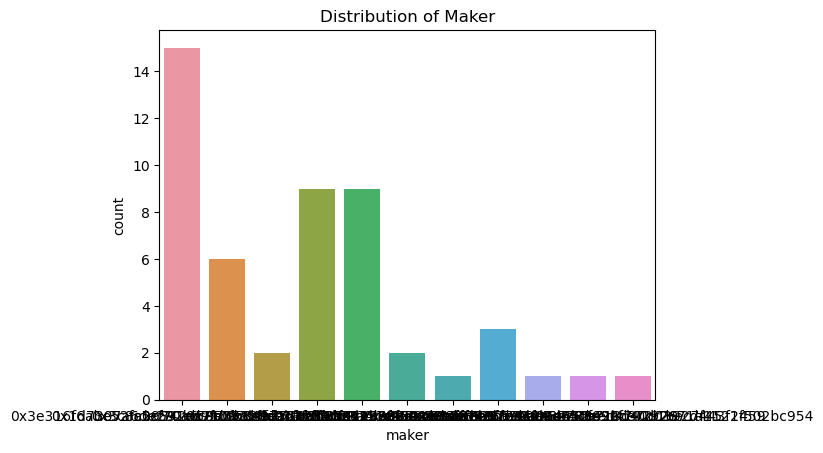

In [12]:
# Visualization of Categorical Attributes
sns.countplot(x ='maker', data = events_df,)
plt.title("Distribution of Maker")
plt.show()

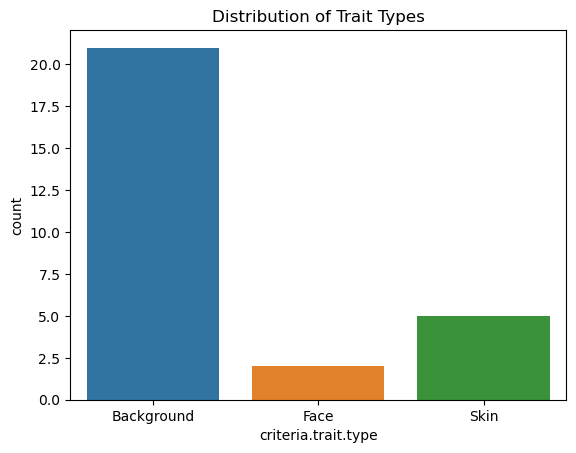

In [13]:
sns.countplot(x ='criteria.trait.type', data = events_df)
plt.title("Distribution of Trait Types")
plt.show()

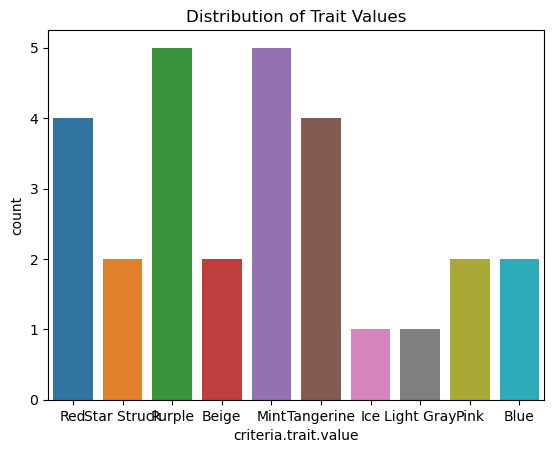

In [14]:
sns.countplot(x ='criteria.trait.value', data = events_df)
plt.title("Distribution of Trait Values")
plt.show()

## Label Encoding

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder()

In [16]:
list(events_df.dtypes[events_df.dtypes == "object"].index)

['event_type',
 'order_hash',
 'order_type',
 'chain',
 'protocol_address',
 'maker',
 'payment.quantity',
 'payment.token_address',
 'payment.symbol',
 'criteria.collection.slug',
 'criteria.contract.address',
 'criteria.trait.type',
 'criteria.trait.value',
 'asset.collection',
 'asset.contract',
 'asset.token_standard',
 'asset.name',
 'asset.description',
 'asset.image_url',
 'asset.metadata_url',
 'asset.opensea_url',
 'asset.updated_at',
 'asset.is_disabled',
 'asset.is_nsfw']

In [17]:
# Create a list of the columns with categorical variables
categorical_variables = ["maker", "criteria.trait.type", "criteria.trait.value"]

# Use the fit_transform method from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(events_df[categorical_variables])

In [30]:
# Create a DataFrame with the encoded variables
enc_df = feature_names = enc.get_feature_names_out()

# Display sample data
print(feature_names)

['maker_0x0097b9cfe64455eed479292671a1121f502bc954'
 'maker_0x061f1013751c49421dceaeb177dc0a5e703691f7'
 'maker_0x1d7307a6de292bd9f75cc1fbf0b733f6b61e369a'
 'maker_0x3c8a29342d58a27ab0d913f808aed1578f59433a'
 'maker_0x3e316f6abe52fc5cf70a6c9c0932dcb1fcbf3d62'
 'maker_0x591ec71097d9fda67cf53732239f9591688f37e9'
 'maker_0x645998e8aa4817ed6c6fe244482d8842ace72c29'
 'maker_0x71bfb8e9775ba531c9a4bc25eca6a8ff8a62c336'
 'maker_0x84ee124284cfe41b387506e3d6149bee0a9ae652'
 'maker_0xac37ccb7ae873555eb01c74cb713d40d1bec7f45'
 'maker_0xc0ee8c18f0709d9d651fe90d30d0392d443f2459'
 'criteria.trait.type_Background' 'criteria.trait.type_Face'
 'criteria.trait.type_Skin' 'criteria.trait.type_nan'
 'criteria.trait.value_Beige' 'criteria.trait.value_Blue'
 'criteria.trait.value_Ice' 'criteria.trait.value_Light Gray'
 'criteria.trait.value_Mint' 'criteria.trait.value_Pink'
 'criteria.trait.value_Purple' 'criteria.trait.value_Red'
 'criteria.trait.value_Star Struck' 'criteria.trait.value_Tangerine'
 'criteri

## Splitting into Dependent and Independent Variables (Target and Features)

In [ ]:
# Specify Input and Output Attributes
X = test_loan_df.drop(columns=['Loan_ID','Loan_Amount_Term','Loan_Status'], axis=1)
y = test_loan_df['Loan_Status']

In [ ]:
# Review the Series of the y Variable
y[:3]

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

## Checking Label Variable (y) Balance Using the value_counts Function

In [ ]:
# Checking the Balance of Our Target Values
y.value_counts()

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64

## Splitting Data into Training and Testing Datasets Using train_test_split

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Splitting the Data Using train_test_split
# Assigning a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
def classification_metrics(y_true, y_pred, class_labels=None):
    """
    Display the classification report and confusion matrix.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        class_labels (list, optional): List of class labels for display. If not provided, it will be inferred.

    Returns:
        None
    """
    if class_labels is None:
        class_labels = sorted(set(y_true))  # Inferring Class Labels from y_true

    # Mapping Binary Labels to Meaningful Labels
    class_labels = ["Loan Repaid", "Defaulted on Loan"]

    # Printing the Classification Report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print("Classification Report:\n", report)
    
    # Computing the Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Creating a Heatmap for the Confusion Matrix
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    
    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting Using the Independent Variables
    pred = model.predict(predictors)

    precision = round(precision_score(target, pred, average='macro'), 2)     # Precision score
    recall = round(recall_score(target, pred, average='macro'), 2)           # Recall score
    accuracy = round(accuracy_score(target, pred), 2)                        # Accuracy score

    # Creating a Dictionary of Metrics
    metrics_dict = {
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
    }

    return metrics_dict

In [ ]:
# Importing the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiating the Logistic Regression model
# Assigning a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state = 1)

# Fitting the model using training data
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

# Creating a Logistic Regression Model with the Original Data

## Making Predictions Using Training Data

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.89      0.46      0.61       143
Defaulted on Loan       0.80      0.97      0.88       317

         accuracy                           0.82       460
        macro avg       0.85      0.72      0.74       460
     weighted avg       0.83      0.82      0.79       460



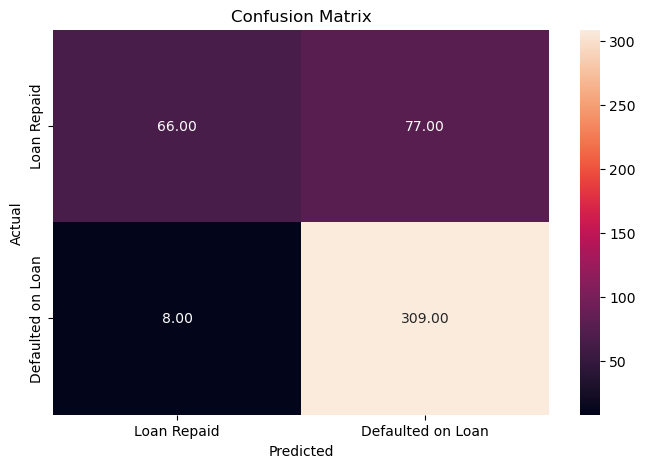

In [ ]:
# Predicting on the Training Set
y_train_pred_log_reg = logistic_regression_model.predict(X_train)

# Evaluating the Performance on the Training Set
classification_metrics(y_train, y_train_pred_log_reg)

Based on the classification report for a logistic regression model, we observe an overall accuracy of 82%.

For the "Loan Repaid" class, the precision is 0.92, recall is 0.45, and F1-score is 0.61. This indicates that when the model predicts a loan will be repaid, it is correct 92% of the time. However, it only correctly identifies 45% of the actual instances where the loan was repaid.

For the "Defaulted on Loan" class, the precision is 0.80, recall is 0.98, and F1-score is 0.88. This suggests that when the model predicts a loan will be defaulted on, it is correct 80% of the time. It also correctly identifies 98% of the actual instances where the loan was defaulted on.

Overall, the model performs better in predicting the "Defaulted on Loan" class compared to the "Loan Repaid" class. This could be due to an imbalance in the dataset or the features used in the model. Further analysis and fine-tuning of the model may be necessary to improve its performance.

## Evaluating Model Performance: Accuracy Score, Confusion Matrix, and Classification Report

## Making Predictions Using Testing Data

In [ ]:
# Predicting on the Test Set
y_prediction = logistic_regression_model.predict(X_test)

In [ ]:
# Printing the Balanced Accuracy Score of the Model
balanced_accuracy_score(y_test, y_prediction)

0.6843537414965986

## Confusion Matrix

In [ ]:
# Generating a Confusion Matrix for the Model
confusion_matrix(y_test, y_prediction)

array([[ 19,  30],
       [  2, 103]])

This confusion matrix indicates the following:

* True Negative (TN): 19
* False Positive (FP): 30
* False Negative (FN): 3
* True Positive (TP): 102

In the context of a binary classification problem:

* TN: The number of correctly predicted instances of the negative class (Loan Repaid in this case).
* FP: The number of incorrectly predicted instances of the positive class (False alarms of Loan Default).
* FN: The number of instances of the negative class incorrectly predicted as positive (Missed opportunities of Loan Repaid).
* TP: The number of correctly predicted instances of the positive class (Defaulted on Loan).

From this confusion matrix, we can observe that the model:

* Correctly predicted 19 instances of Loan Repaid (TN).
* Incorrectly predicted 30 instances as Defaulted on Loan when they were actually Loan Repaid (FP).
* Missed predicting 3 instances of Loan Repaid as Loan Repaid (FN).
* Correctly predicted 102 instances of Defaulted on Loan (TP).

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.90      0.39      0.54        49
Defaulted on Loan       0.77      0.98      0.87       105

         accuracy                           0.79       154
        macro avg       0.84      0.68      0.70       154
     weighted avg       0.82      0.79      0.76       154



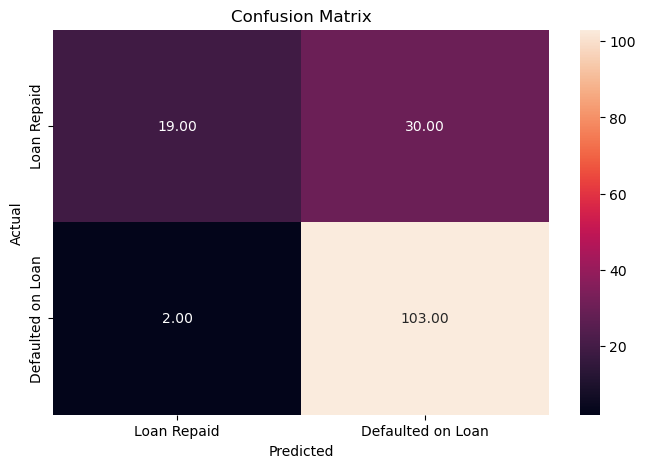

In [ ]:
# Evaluating the Performance on the Test Set
classification_metrics(y_test, y_prediction)

Based on the provided classification report from a logistic regression model:

* Precision for the “Loan Repaid” class is 0.86, indicating that when the model predicts a loan to be repaid, it is correct 86% of the time.
* Recall for the “Loan Repaid” class is 0.39, indicating that the model correctly identifies 39% of the actual instances of loans being repaid.
* The F1-score for the “Loan Repaid” class is 0.54, representing the harmonic mean of precision and recall, balancing both metrics.
* Precision for the “Defaulted on Loan” class is 0.77, meaning when the model predicts a loan to be defaulted, it is correct 77% of the time.
* Recall for the “Defaulted on Loan” class is 0.97, indicating that the model correctly identifies 97% of the actual instances of defaulted loans.
* The F1-score for the “Defaulted on Loan” class is 0.86, representing the balance between precision and recall for this class.

Overall, the model achieves an accuracy of 79%, with a macro average F1-score of 0.70 and a weighted average F1-score of 0.76. The macro average considers the unweighted mean of precision, recall, and F1-score across both classes, while the weighted average considers the average weighted by support (the number of true instances for each class).

## Predicting with a Logistic Regression Model Using Resampled Training Data

 Using the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points.

In [ ]:
# Importing the RandomOverSampler module from imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiating the Random Oversampler Model
# Assigning a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

# Fitting the original training data to the Random Oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [ ]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

Loan_Status
1.0    317
0.0    317
Name: count, dtype: int64

## Fitting Logistic Regression Model and Making Predictions Using Resampled Data

In [ ]:
# Instantiating the Logistic Regression Model
# Assigning a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fitting the model using the resampled training data
model.fit(X_resampled, y_resampled)
# Making Predictions Using Testing Data
y_pred = model.predict(X_test)

## Evaluating Model Performance: Accuracy Score, Confusion Matrix, and Classification Report with Resampled Data

In [ ]:
# Printing the Balanced Accuracy Score of the Model 
balanced_accuracy_score(y_test, y_pred)

0.7326530612244897

## Confusion Matrix

In [ ]:
# Generating a Confusion Matrix for the Model
confusion_matrix(y_test, y_pred)

array([[27, 22],
       [ 9, 96]])

This confusion matrix indicates the following:

* True Negative (TN): 25
* False Positive (FP): 24
* False Negative (FN): 16
* True Positive (TP): 89

In the context of a binary classification problem:

* TN: The number of correctly predicted instances of the negative class (Loan Repaid in this case).
* FP: The number of incorrectly predicted instances of the positive class (False alarms of Loan Default).
* FN: The number of instances of the negative class incorrectly predicted as positive (Missed opportunities of Loan Repaid).
* TP: The number of correctly predicted instances of the positive class (Defaulted on Loan).

From this confusion matrix, we can observe that the model:

* Correctly predicted 25 instances of Loan Repaid (TN).
* Incorrectly predicted 24 instances as Defaulted on Loan when they were actually Loan Repaid (FP).
* Missed predicting 16 instances of Loan Repaid as Loan Repaid (FN).
* Correctly predicted 89 instances of Defaulted on Loan (TP).

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.75      0.55      0.64        49
Defaulted on Loan       0.81      0.91      0.86       105

         accuracy                           0.80       154
        macro avg       0.78      0.73      0.75       154
     weighted avg       0.79      0.80      0.79       154



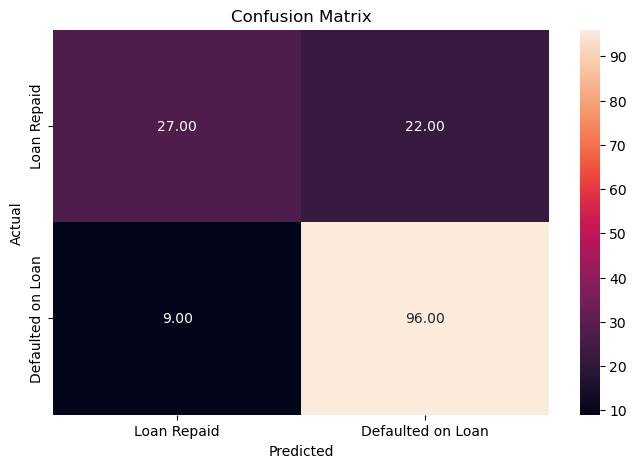

None


In [ ]:
# Printing the Classification Report for the Model
print(classification_metrics(y_test, y_pred))

---

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Building the Model
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

# Fitting the Decision Tree Model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.86      0.39      0.54        49
Defaulted on Loan       0.77      0.97      0.86       105

         accuracy                           0.79       154
        macro avg       0.82      0.68      0.70       154
     weighted avg       0.80      0.79      0.76       154



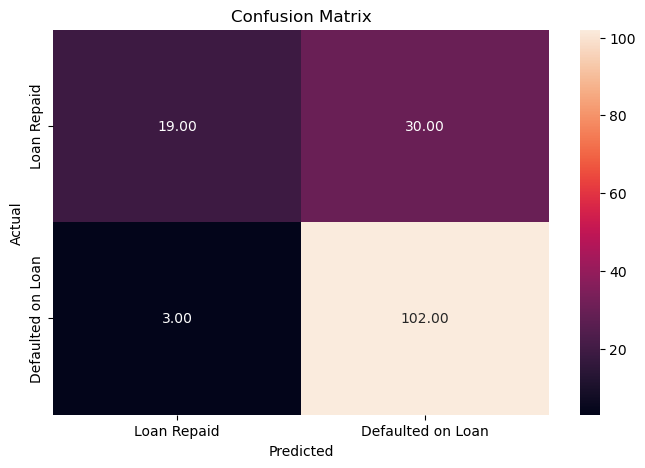

In [ ]:
# Checking Performance on the Test Dataset
y_test_pred_decision_tree = decision_tree.predict(X_test)

classification_metrics(y_test, y_test_pred_decision_tree)

The decision tree model’s performance can be analyzed based on the provided classification report:

* Precision for the “Loan Repaid” class is 0.86, indicating that when the model predicts a loan to be repaid, it is correct 86% of the time.
* Recall for the “Loan Repaid” class is 0.39, meaning the model correctly identifies only 39% of the actual instances of loans being repaid.
* The F1-score for the “Loan Repaid” class is 0.54, which is the harmonic mean of precision and recall, balancing both metrics.
* Precision for the “Defaulted on Loan” class is 0.77, indicating that when the model predicts a loan to be defaulted, it is correct 77% of the time.
* Recall for the “Defaulted on Loan” class is 0.97, meaning the model correctly identifies 97% of the actual instances of defaulted loans.
* The F1-score for the “Defaulted on Loan” class is 0.86, representing the balance between precision and recall for this class.

Overall, the model’s accuracy is 79%, with a macro average F1-score of 0.70 and a weighted average F1-score of 0.76. These metrics provide insights into the decision tree model’s performance in predicting loan repayment status.

In [ ]:
decision_tree_test = model_performance_classification(decision_tree, X_test, y_test)
decision_tree_test

{'Precision': 0.82, 'Recall': 0.68, 'Accuracy': 0.79}

Text(0.5, 1.0, 'Feature Importances')

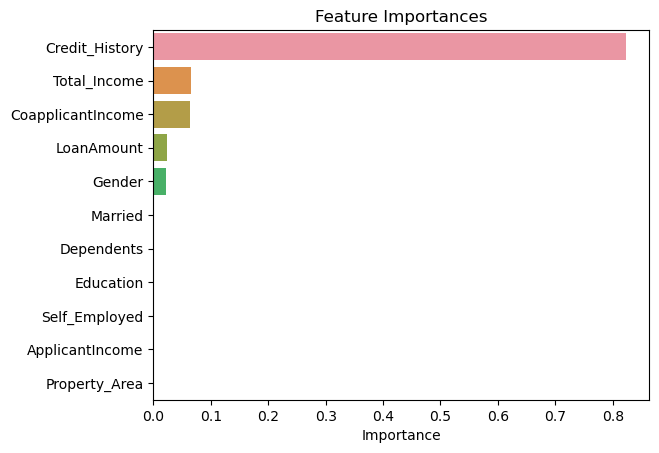

In [ ]:
# Calculate the feature importances
important_features = decision_tree.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

Results suggest that credit history is the most important feature.
On the other hand, deragatory marks are considered least important.

## Random Forest

In [ ]:
# Fitting the Random Forest Classifier on the Training Data
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 100,n_estimators = 500, random_state = 1)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=500, random_state=1)

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.77      0.47      0.58        49
Defaulted on Loan       0.79      0.93      0.86       105

         accuracy                           0.79       154
        macro avg       0.78      0.70      0.72       154
     weighted avg       0.78      0.79      0.77       154



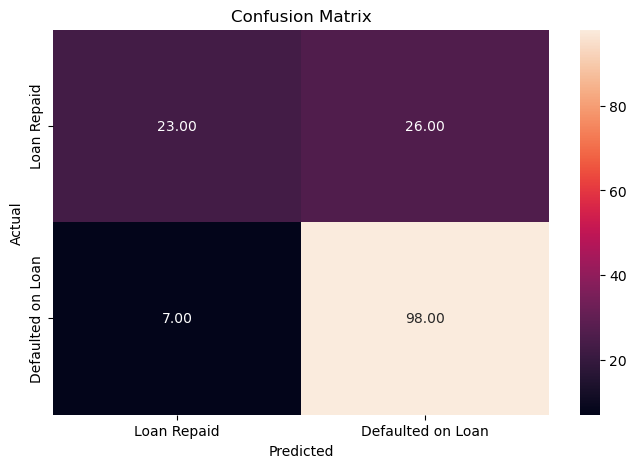

In [ ]:
# Checking Performance on the Testing Data
y_pred_test_rf = rf_model.predict(X_test)

classification_metrics(y_test, y_pred_test_rf)

Analyzing the performance of the Random Forest classifier based on the provided classification report:

* Precision for the “Loan Repaid” class is 0.79, indicating that when the model predicts a loan to be repaid, it is correct 79% of the time.
* Recall for the “Loan Repaid” class is 0.45, meaning the model correctly identifies only 45% of the actual instances of loans being repaid.
* The F1-score for the “Loan Repaid” class is 0.57, which is the harmonic mean of precision and recall, providing a balance between the two metrics.
* Precision for the “Defaulted on Loan” class is 0.79, indicating that when the model predicts a loan to be defaulted, it is correct 79% of the time.
* Recall for the “Defaulted on Loan” class is 0.94, meaning the model correctly identifies 94% of the actual instances of defaulted loans.
* The F1-score for the “Defaulted on Loan” class is 0.86, representing the balance between precision and recall for this class.

Overall, the model’s accuracy is 79%, with a macro average F1-score of 0.71 and a weighted average F1-score of 0.77. These metrics provide insights into the Random Forest classifier’s performance in predicting loan repayment status, showcasing comparable results to the logistic regression and decision tree models.

The Random Forest model demonstrates good generalization performance on the test data.

In [ ]:
rf_model_test = model_performance_classification(rf_model, X_test, y_test)
rf_model_test

{'Precision': 0.78, 'Recall': 0.7, 'Accuracy': 0.79}

Results suggest that credit history is the most important feature.
On the other hand, deragatory marks are considered least important.

## Naive Bayes

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.78      0.43      0.55        49
Defaulted on Loan       0.78      0.94      0.85       105

         accuracy                           0.78       154
        macro avg       0.78      0.69      0.70       154
     weighted avg       0.78      0.78      0.76       154



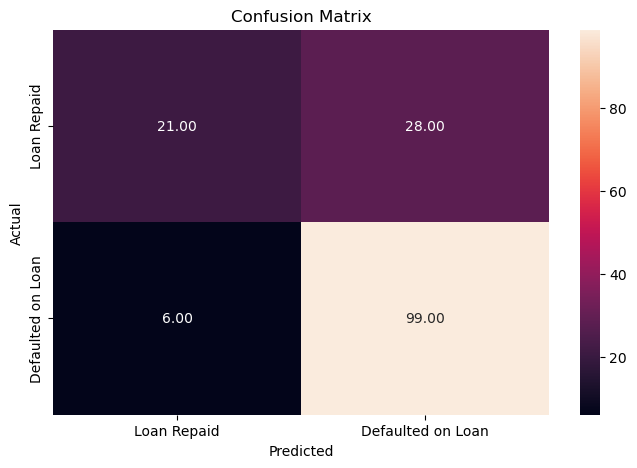

In [ ]:
# Using Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train,y_train)
model_predict = naive_model.predict(X_test)
classification_metrics(y_test, model_predict)

Analyzing the performance of the Naive Bayes model based on the provided classification report:

* Precision for the “Loan Repaid” class is 0.78, indicating that when the model predicts a loan to be repaid, it is correct 78% of the time.
* Recall for the “Loan Repaid” class is 0.43, meaning the model correctly identifies only 43% of the actual instances of loans being repaid.
* The F1-score for the “Loan Repaid” class is 0.55, which is the harmonic mean of precision and recall, providing a balance between the two metrics.
* Precision for the “Defaulted on Loan” class is 0.78, indicating that when the model predicts a loan to be defaulted, it is correct 78% of the time.
* Recall for the “Defaulted on Loan” class is 0.94, meaning the model correctly identifies 94% of the actual instances of defaulted loans.
* The F1-score for the “Defaulted on Loan” class is 0.85, representing the balance between precision and recall for this class.

Overall, the model’s accuracy is 78%, with a macro average F1-score of 0.70 and a weighted average F1-score of 0.76. These metrics provide insights into the Naive Bayes model’s performance in predicting loan repayment status, indicating similar performance to the logistic regression, decision tree, and Random Forest classifiers.

## Gradient Boosting

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.69      0.45      0.54        49
Defaulted on Loan       0.78      0.90      0.84       105

         accuracy                           0.76       154
        macro avg       0.73      0.68      0.69       154
     weighted avg       0.75      0.76      0.74       154



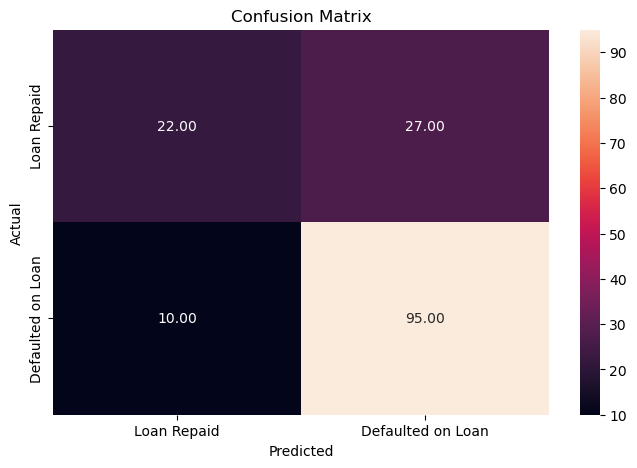

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_clf = GradientBoostingClassifier(n_estimators=500,max_depth=10)
gboost_clf.fit(X_train,y_train)
gboost_pred = gboost_clf.predict(X_test)
classification_metrics(y_test, gboost_pred)

Analyzing the performance of the Gradient Boosting model based on the provided classification report:

* Precision for the “Loan Repaid” class is 0.64, indicating that when the model predicts a loan to be repaid, it is correct 64% of the time.
* Recall for the “Loan Repaid” class is 0.47, meaning the model correctly identifies only 47% of the actual instances of loans being repaid.
* The F1-score for the “Loan Repaid” class is 0.54, which is the harmonic mean of precision and recall, providing a balance between the two metrics.
* Precision for the “Defaulted on Loan” class is 0.78, indicating that when the model predicts a loan to be defaulted, it is correct 78% of the time.
* Recall for the “Defaulted on Loan” class is 0.88, meaning the model correctly identifies 88% of the actual instances of defaulted loans.
* The F1-score for the “Defaulted on Loan” class is 0.83, representing the balance between precision and recall for this class.

Overall, the model’s accuracy is 75%, with a macro average F1-score of 0.68 and a weighted average F1-score of 0.73. These metrics provide insights into the Gradient Boosting model’s performance in predicting loan repayment status.

In [ ]:
gboost_clf_test = model_performance_classification(gboost_clf, X_test, y_test)
gboost_clf_test

{'Precision': 0.73, 'Recall': 0.68, 'Accuracy': 0.76}

Text(0.5, 1.0, 'Feature Importances')

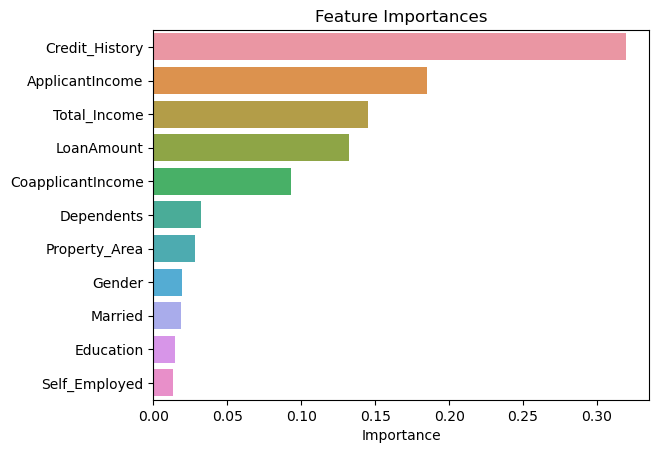

In [ ]:
# Calculate the feature importances
important_features = gboost_clf.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

Results suggest that credit history is the most important feature.
On the other hand, deragatory marks are considered least important.

In [ ]:
# Creating a Dictionary of Models
models = {
    'logistic_model': logistic_regression_model,
    'decision_tree': decision_tree,
    'rf_model': rf_model,
    'naive_model': naive_model,
    'gboost_clf': gboost_clf
    
}

# Creating an Empty List to Store the Results
results = []

# Iterating Through the Models and Computing the Performance Metrics
for model_name, model in models.items():  # Using .items() to Iterate Through Both Keys and Values
    metrics = model_performance_classification(model, X_test, y_test)
    results.append({'Model': model_name, **metrics})

# Creating a DataFrame from the Results
comparing_test_models_df = pd.DataFrame(results)

# Setting the 'Model' Column as the Index
comparing_test_models_df.set_index('Model', inplace=True)

# Displaying the DataFrame
print(comparing_test_models_df)

                Precision  Recall  Accuracy
Model                                      
logistic_model       0.84    0.68      0.79
decision_tree        0.82    0.68      0.79
rf_model             0.78    0.70      0.79
naive_model          0.78    0.69      0.78
gboost_clf           0.73    0.68      0.76
